# Logistic Regression

In [6]:
import pandas as pd
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header= None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x = pima[feature_cols] # Features
y = pima.label # Target variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

print("\ny_pred: ", y_pred)

#Accuracy Score
print("\nAccuracy Score: ", logreg.score(x_test,y_test))
mse = metrics.mean_squared_error(y_test, logreg.predict(x_test))
#Mean Square Error
print("\nMean Squared Error: ",mse)
#Root Mean Square Error
print("\nRoot Mean Squared Error: ",np.sqrt(mse))

     pregnant  insulin   bmi  age  glucose  bp  pedigree
762         9        0  22.5   33       89  62     0.142
127         1       94  33.3   23      118  58     0.261
564         0        0  32.4   27       91  80     0.601
375        12      325  39.2   58      140  82     0.528
663         9      130  37.9   40      145  80     0.637
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
192         7        0  30.4   36      159  66     0.383
629         4        0  24.7   21       94  65     0.148
559        11        0  30.1   35       85  74     0.300
684         5        0   0.0   69      136  82     0.640

[576 rows x 7 columns]

y_pred:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 

C:\Users\sawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CONFUSION MATRIX:
 [[117  13]
 [ 24  38]]


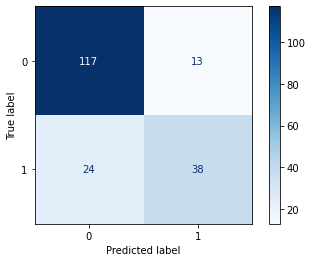

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX:\n", cnf_matrix)

metrics.plot_confusion_matrix(logreg, x_test, y_test,  cmap=plt.cm.Blues)  
plt.show()

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1-Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516
f1-Score: 0.672566371681416
